In [6]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf

In [9]:
tf.__version__


'2.2.0'

In [10]:
mnist = tf.keras.datasets.mnist # 28x28 images of hand written digits 0-9

In [21]:
#now, we are loading the data into these two parameters
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#This makes easier for the network to learn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#Now, Building the model

model = tf.keras.models.Sequential()
#We try to flatten the layers is because before this is a mulitdimensional array
#these are the input layers
model.add(tf.keras.layers.Flatten())
#these are the hidden dense layers
#.relu means rectify linear
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#these are the output layers, the parameter for the output layer will always
#be the number of clasification, in this case we have (10), we use .softmax for probablity dist
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


#now parameters to us training of the model
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2622 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9772


In [22]:
#now, we are calculating the validation loss
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9670
0.10513206571340561 0.9670000076293945


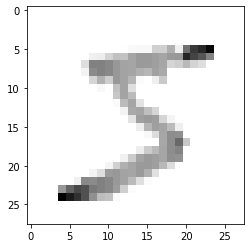

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
#plt.show()
#print(x_train[0])

In [23]:
model.save("Number_reader.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Number_reader.model\assets


In [28]:
new_model = tf.keras.models.load_model("Number_reader.model")


In [29]:
predictions = new_model.predict([x_test])

AttributeError: in user code:

    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1122 predict_step  **
        return self(x, training=False)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:291 call
        outputs = layer(inputs, **kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:642 call
        input_shape = inputs.shape

    AttributeError: 'tuple' object has no attribute 'shape'


In [27]:
print(predictions)

NameError: name 'predictions' is not defined